In [ ]:
#Install necessary package if bot installed
!pip install pandas numpy statsmodels matplotlib seaborn

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
df = pd.read_csv('/content/us-airlines-monthly-aircraft-miles-flown.csv', index_col=0, parse_dates=True)

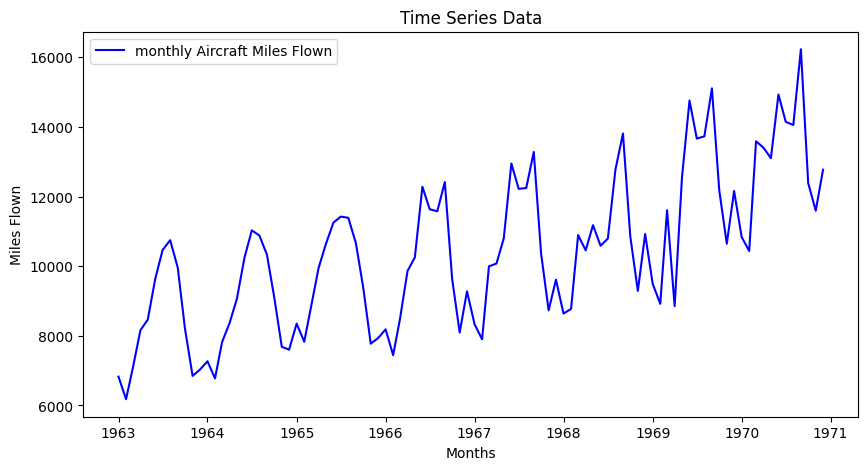

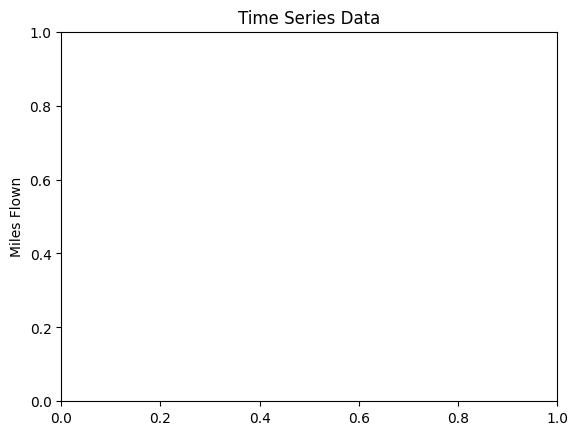

In [ ]:
#Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(df, label='monthly Aircraft Miles Flown', color='blue') #assuming you want blue, replace 'b' with desired color
plt.legend()
plt.xlabel('Months')
plt.ylabel('Miles Flown')
plt.title('Time Series Data')
plt.show()
plt.ylabel('Miles Flown')
plt.title('Time Series Data')
plt.show()

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print("ADF Statistics:", result[0])
  print("p-value:", result[1])
  if result[1] <= 0.05:
    print("Data is stationary")
  else:
    print("Data is non-stationary")

In [ ]:
df['MilesMM_diff'] = df['MilesMM'].diff().dropna()
df['MilesMM_seasonal_diff'] = df['MilesMM_diff'].diff().dropna()

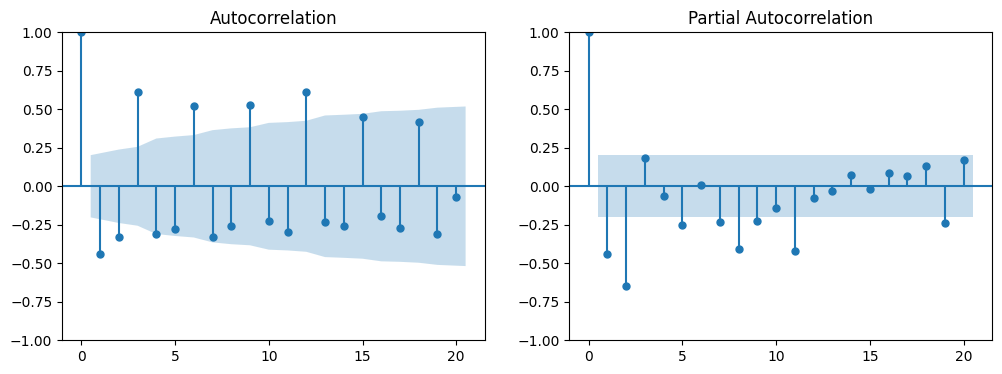

In [ ]:
#Plot ACF andPACF to identify parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['MilesMM_seasonal_diff'].dropna(), ax=ax[0]) # Changed axes to ax to match variable name
plot_pacf(df['MilesMM_seasonal_diff'].dropna(), ax=ax[1]) # Changed axes to ax to match variable name
plt.show()


In [ ]:
p, d, q = 1, 1, 1 #ARIMA order
P, D, Q, m = 1, 1, 1, 12 #Seasonal order

In [ ]:
#Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['MilesMM'],
                                         order=(p, d, q),
                                         seasonal_order=(P, D, Q, m),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
sarima_result = sarima_model.fit()

In [ ]:
#Model summary
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            MilesMM   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -559.576
Date:                            Thu, 03 Apr 2025   AIC                           1129.151
Time:                                    04:30:16   BIC                           1140.322
Sample:                                01-01-1963   HQIC                          1133.583
                                     - 12-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0870      0.161      0.540      0.589      -0.229       0.403
ma.L1         -0.7840      0.121   

In [ ]:
#Forecasting for next 24 months
future_steps = 24
forecast = sarima_result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')[1:]
forecast_index

<ipython-input-13-f951730e3d14>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')[1:]


DatetimeIndex(['1971-02-28', '1971-03-31', '1971-04-30', '1971-05-31',
               '1971-06-30', '1971-07-31', '1971-08-31', '1971-09-30',
               '1971-10-31', '1971-11-30', '1971-12-31', '1972-01-31',
               '1972-02-29', '1972-03-31', '1972-04-30', '1972-05-31',
               '1972-06-30', '1972-07-31', '1972-08-31', '1972-09-30',
               '1972-10-31', '1972-11-30', '1972-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
forecast_ci = forecast.conf_int()
forecast_ci

,lower MilesMM,upper MilesMM
1971-01-01,10032.925594,13165.431466
1971-02-01,9552.795625,12825.937760
1971-03-01,12226.361666,15586.401075
1971-04-01,10715.604229,14156.746025
1971-05-01,12545.863593,16065.936922
1971-06-01,14216.862440,17814.110042
1971-07-01,13381.504405,17054.302828
1971-08-01,13613.377980,17360.203944
1971-09-01,15139.349451,18958.768416
1971-10-01,11889.844726,15780.502467


In [ ]:
#Forecasting for next 24 months
future_steps = 24
forecast = sarima_result.get_forecast(steps=future_steps)
# Instead of excluding the first element, generate the index directly for the forecast period
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
forecast_index

<ipython-input-15-56010fd4fdbc>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


DatetimeIndex(['1971-01-31', '1971-02-28', '1971-03-31', '1971-04-30',
               '1971-05-31', '1971-06-30', '1971-07-31', '1971-08-31',
               '1971-09-30', '1971-10-31', '1971-11-30', '1971-12-31',
               '1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30', '1972-07-31', '1972-08-31',
               '1972-09-30', '1972-10-31', '1972-11-30', '1972-12-31'],
              dtype='datetime64[ns]', freq='ME')

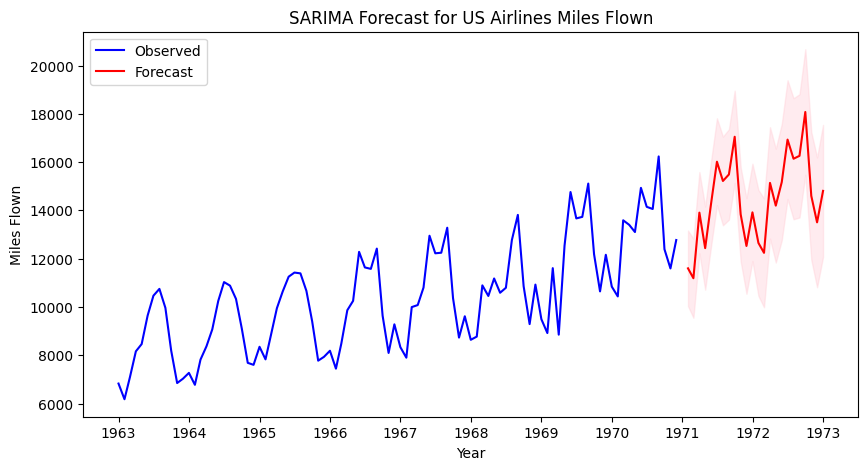

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['MilesMM'],label='Observed',color='blue')
plt.plot(forecast_index,forecast.predicted_mean, label='Forecast',color='red') # Changed 'forcast' to 'forecast' and 'cplpr' to 'color'
plt.fill_between(forecast_index,forecast_ci.iloc[:,0],forecast_ci.iloc[:,1],color='pink',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Miles Flown')
plt.title('SARIMA Forecast for US Airlines Miles Flown')
plt.legend()
plt.show()

In [ ]:
adf_test(df['MilesMM'])

ADF Statistics: 1.0229489778119758
p-value: 0.9945022811234028
Data is non-stationary


In [ ]:
ts_log = np.log(ts)

#Inverse
ts_orig = np.exp(ts_log)

In [ ]:
ts_log = np.log(ts)
ts_d_log = np.log(ts_log)

#Inverse
ts_orig1 = np.exp(ts_d_log)
ts_orig = np.exp(ts_orig1)


In [ ]:
ts_log = np.log(ts)
#difference between the 2 consecutive log values
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

# Inverse
# add the shifted lag values to the first log value to get the cumulative sum
ts_log_cumsum = ts_log_diff.cumsum()

#add the cumulative sum to the first log value to get the restored log time series
ts_log-restored = ts_log.iloc[0] +ts_log